# UFC 270 ПРЕДСКАЗАНИЕ

В этом блокноте я использую следующие алгоритмы построения модели:

    Gaussian Naive Bayes
    Logistic Regression
    Decision Tree
    KNN
    Random Forest
    Support Vector Classifier
    XGBoost
    Artificial Neural Network

Данные были спарсены с сайта ufcstats 31.12.2021.

После обучения модели с наивысшей оценкой точности (с использованием перекрестной проверки) применятся к предстоящему событию (23 января 2022 года), чтобы сделать прогнозы победителей поединков.

# Импорт библиотек

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

import xgboost
from xgboost import XGBClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers, models, optimizers




2021-12-31 12:57:51.729164: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-31 12:57:51.729211: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Импорт и очистка данных для использования в моделях

In [19]:
data = pd.read_csv("data/data.csv", sep=',')

In [6]:
data.head(5)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Derrick Lewis,Chris Daukaus,Mark Smith,2021-12-18,"Las Vegas, Nevada, USA",Red,False,Heavyweight,1.500000,0.000000,...,2.0,12.0,0.0,0.0,Orthodox,190.50,200.66,260.0,32.0,36.0
1,Dustin Stoltzfus,Gerald Meerschaert,Mark Smith,2021-12-18,"Las Vegas, Nevada, USA",Blue,False,Middleweight,0.031738,0.188477,...,0.0,0.0,0.0,0.0,Orthodox,182.88,190.50,185.0,34.0,30.0
2,Stephen Thompson,Belal Muhammad,Herb Dean,2021-12-18,"Las Vegas, Nevada, USA",Blue,False,Welterweight,0.000000,0.016235,...,6.0,5.0,0.0,0.0,Orthodox,182.88,190.50,170.0,33.0,38.0
3,Amanda Lemos,Angela Hill,Jason Herzog,2021-12-18,"Las Vegas, Nevada, USA",Red,False,WomenStrawweight,0.062538,0.000000,...,1.0,2.0,1.0,0.0,Southpaw,162.56,165.10,115.0,36.0,34.0
4,Diego Ferreira,Mateusz Gamrot,Jason Herzog,2021-12-18,"Las Vegas, Nevada, USA",Blue,False,Lightweight,0.250000,0.250000,...,3.0,3.0,2.0,0.0,Orthodox,175.26,187.96,155.0,31.0,36.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405 entries, 0 to 6404
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(118), int64(16), object(9)
memory usage: 7.0+ MB


Text(0.5, 1.0, 'Пропущенные значения')

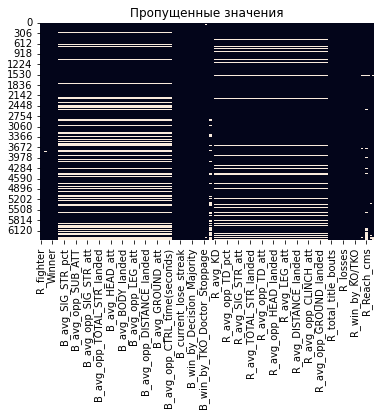

In [8]:
sns.heatmap(data.isnull(), cbar = False).set_title("Пропущенные значения")

In [10]:
data.isnull().sum()

R_fighter         0
B_fighter         0
Referee          32
date              0
location          0
               ... 
R_Height_cms     11
R_Reach_cms     408
R_Weight_lbs      9
B_age           172
R_age            70
Length: 144, dtype: int64

In [27]:
data_drop = data.loc[data['B_total_time_fought(seconds)'].isnull()]

In [28]:
data = data[~data.index.isin(data_drop.index)]

In [29]:
data.isnull().sum()

R_fighter         0
B_fighter         0
Referee          25
date              0
location          0
               ... 
R_Height_cms      6
R_Reach_cms     190
R_Weight_lbs      5
B_age            64
R_age            19
Length: 144, dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 0 to 6395
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(118), int64(16), object(9)
memory usage: 5.4+ MB
